In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [185]:
df_patient = pd.read_csv('./data/patient_data_cluster.csv')

In [186]:
df_patient

,stay_id,age,gender,intime,outtime,deathtime,los,insurance,language,marital_status,race,discharge_location,charlson_comorbidity_index,hospital_expire_flag,cluster
0,30000646,44.319070,M,2194-04-29 01:39:22,2194-05-03 18:23:48,2194-05-06 02:29:00,4.697523,Medicaid,?,MARRIED,ASIAN - CHINESE,DIED,7,1,4
1,30001471,91.334102,M,2189-05-02 06:57:00,2189-05-05 16:02:33,NaN,3.378854,Other,?,MARRIED,HISPANIC/LATINO - SALVADORAN,HOME,7,0,0
2,30003087,55.918622,M,2132-12-01 20:58:25,2132-12-07 21:18:19,NaN,6.013819,Other,ENGLISH,NaN,UNKNOWN,HOME HEALTH CARE,3,0,0
3,30003598,64.171038,F,2189-04-14 20:27:25,2189-04-19 15:57:41,NaN,4.812685,Medicare,ENGLISH,MARRIED,WHITE,SKILLED NURSING FACILITY,4,0,2
4,30004018,56.987924,F,2158-12-27 21:32:00,2159-01-12 23:47:50,2159-01-12 17:45:00,16.094329,Other,ENGLISH,MARRIED,WHITE,DIED,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22435,39998012,40.091125,F,2133-02-03 06:48:42,2133-02-09 02:55:42,2133-02-08 23:02:00,5.838194,Medicare,ENGLISH,MARRIED,WHITE,DIED,3,1,1
22436,39998622,67.109608,M,2135-02-11 18:13:55,2135-02-20 17:53:16,NaN,8.985660,Other,ENGLISH,MARRIED,WHITE,SKILLED NURSING FACILITY,5,0,4
22437,39999230,49.648598,M,2147-08-31 22:31:28,2147-09-09 17:54:10,NaN,8.807431,Other,ENGLISH,MARRIED,WHITE,HOME HEALTH CARE,4,0,0
22438,39999562,71.058909,M,2129-01-24 17:24:09,2129-01-29 17:18:49,NaN,4.996296,Medicare,ENGLISH,MARRIED,WHITE,HOME HEALTH CARE,5,0,4


In [235]:
conditions = [
    (df_patient['cluster'] == 0),
    (df_patient['cluster'] == 1),
    (df_patient['cluster'] == 2),
    (df_patient['cluster'] == 3),
    (df_patient['cluster'] == 4),
    ]

# create a list of the values we want to assign for each condition
values = ['C', 'E', 'B', 'D', 'A']

# create a new column and use np.select to assign values to it using our lists as arguments
df_patient['cluster_alpha'] = np.select(conditions, values)

df_patient.head(10)

,stay_id,age,gender,intime,outtime,deathtime,los,insurance,language,marital_status,race,discharge_location,charlson_comorbidity_index,hospital_expire_flag,cluster,cluster_alpha,language_split,race_split,marry_split
0,30000646,44.319070,M,2194-04-29 01:39:22,2194-05-03 18:23:48,2194-05-06 02:29:00,4.697523,Medicaid,?,MARRIED,ASIAN - CHINESE,DIED,7,1,4,A,Non-English,Non-White,Married
1,30001471,91.334102,M,2189-05-02 06:57:00,2189-05-05 16:02:33,NaN,3.378854,Other,?,MARRIED,HISPANIC/LATINO - SALVADORAN,HOME,7,0,0,C,Non-English,Non-White,Married
2,30003087,55.918622,M,2132-12-01 20:58:25,2132-12-07 21:18:19,NaN,6.013819,Other,ENGLISH,NaN,UNKNOWN,HOME HEALTH CARE,3,0,0,C,English,Non-White,Unmarried
3,30003598,64.171038,F,2189-04-14 20:27:25,2189-04-19 15:57:41,NaN,4.812685,Medicare,ENGLISH,MARRIED,WHITE,SKILLED NURSING FACILITY,4,0,2,B,English,White,Married
4,30004018,56.987924,F,2158-12-27 21:32:00,2159-01-12 23:47:50,2159-01-12 17:45:00,16.094329,Other,ENGLISH,MARRIED,WHITE,DIED,3,1,1,E,English,White,Married
5,30004144,82.255538,M,2126-04-04 13:20:25,2126-04-08 21:02:10,NaN,4.320660,Medicare,ENGLISH,MARRIED,WHITE,REHAB,6,0,0,C,English,White,Married
6,30004391,89.677629,M,2153-09-05 13:12:00,2153-09-13 18:21:18,NaN,8.214792,Medicare,ENGLISH,MARRIED,WHITE,CHRONIC/LONG TERM ACUTE CARE,5,0,2,B,English,White,Married
7,30004530,63.572991,M,2165-07-31 09:40:35,2165-08-03 16:29:09,NaN,3.283727,Medicare,ENGLISH,DIVORCED,WHITE,HOME HEALTH CARE,6,0,4,A,English,White,Unmarried
8,30005085,60.064630,M,2136-01-26 10:37:03,2136-01-29 17:10:33,NaN,3.273264,Other,?,MARRIED,WHITE,HOME HEALTH CARE,5,0,4,A,Non-English,White,Married
9,30005362,80.958160,M,2156-12-28 21:42:10,2157-01-03 19:16:43,2157-01-03 15:14:00,5.898993,Other,ENGLISH,MARRIED,WHITE,DIED,13,1,3,D,English,White,Married


In [297]:
conditions = [
    (df_patient['hospital_expire_flag'] == 1),
    (df_patient['hospital_expire_flag'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Dead', 'Alive']

# create a new column and use np.select to assign values to it using our lists as arguments
df_patient['dead_or_alive'] = np.select(conditions, values)

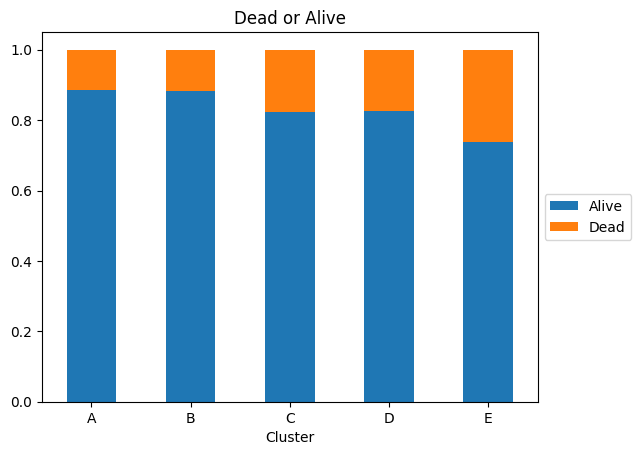

In [321]:
df_patient.groupby(['cluster_alpha'])['dead_or_alive'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, title="Dead or Alive")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("dead_or_alive.png", bbox_inches='tight')

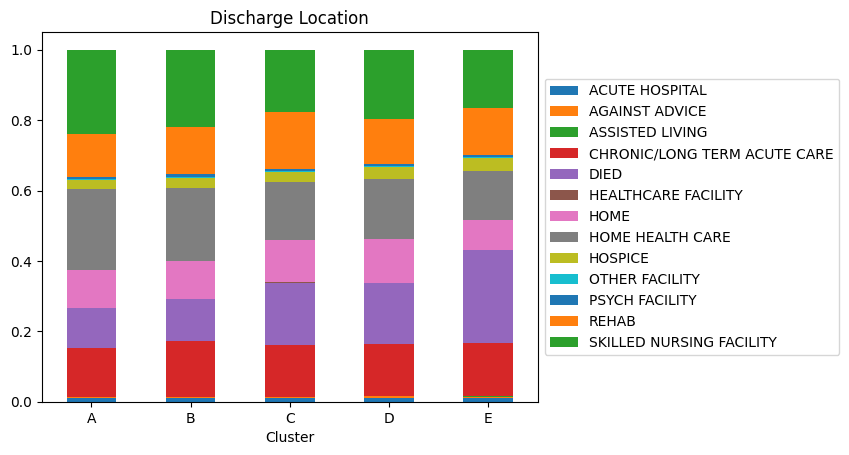

In [322]:
df_patient.groupby(['cluster_alpha'])['discharge_location'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, legend=False, title="Discharge Location", xlabel="Cluster")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("discharge_location.png", bbox_inches='tight')

In [238]:
conditions = [
    (df_patient['language'] == "ENGLISH"),
    (df_patient['language'] != "ENGLISH")
    ]

# create a list of the values we want to assign for each condition
values = ['English', 'Non-English']

# create a new column and use np.select to assign values to it using our lists as arguments
df_patient['language_split'] = np.select(conditions, values)

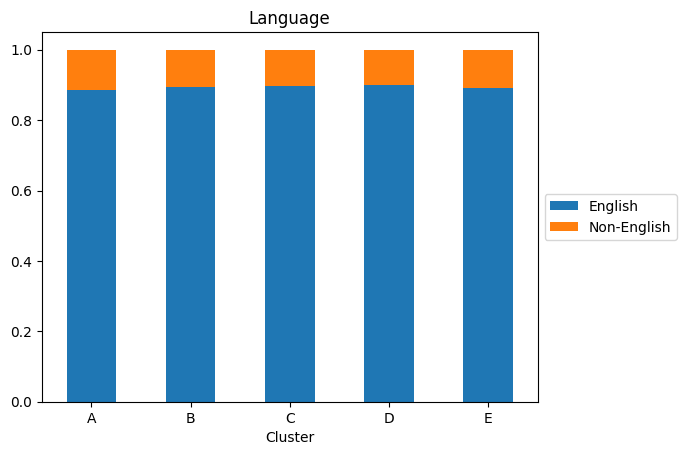

In [323]:
df_patient.groupby(['cluster_alpha'])['language_split'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, legend=True, title="Language")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("language.png")

In [307]:
conditions = [
    (df_patient['race'] == "WHITE"),
    (df_patient['race'] != "WHITE")
    ]

# create a list of the values we want to assign for each condition
values = ['White', 'Non-White']

# create a new column and use np.select to assign values to it using our lists as arguments
df_patient['race_split'] = np.select(conditions, values)

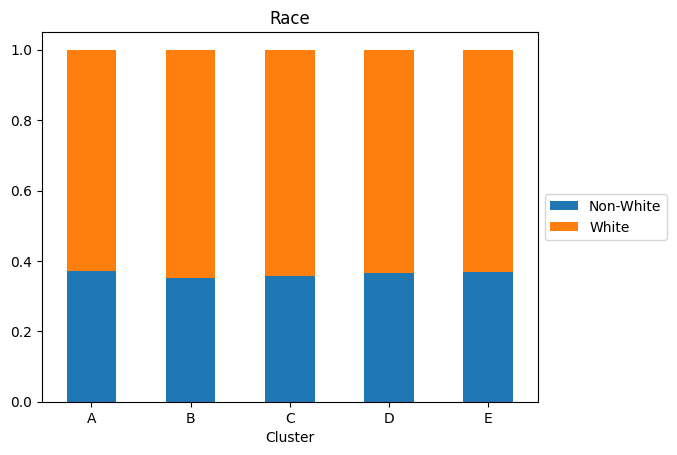

In [324]:
df_patient.groupby(['cluster_alpha'])['race_split'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, legend=True, title="Race")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("race.png", bbox_inches='tight')

In [309]:
conditions = [(df_patient['charlson_comorbidity_index'].between(0,1)),
    (df_patient['charlson_comorbidity_index'].between(2,3)),
    (df_patient['charlson_comorbidity_index'].between(4, 999))]
    

# create a list of the values we want to assign for each condition
values = ['0-1', '2-3', '>=4']

# create a new column and use np.select to assign values to it using our lists as arguments
df_patient['charlson'] = np.select(conditions, values)

df_patient

,stay_id,age,gender,intime,outtime,deathtime,los,insurance,language,marital_status,...,discharge_location,charlson_comorbidity_index,hospital_expire_flag,cluster,cluster_alpha,language_split,race_split,marry_split,charlson,dead_or_alive
0,30000646,44.319070,M,2194-04-29 01:39:22,2194-05-03 18:23:48,2194-05-06 02:29:00,4.697523,Medicaid,?,MARRIED,...,DIED,7,1,4,A,Non-English,Non-White,Married,>=4,Dead
1,30001471,91.334102,M,2189-05-02 06:57:00,2189-05-05 16:02:33,NaN,3.378854,Other,?,MARRIED,...,HOME,7,0,0,C,Non-English,Non-White,Married,>=4,Alive
2,30003087,55.918622,M,2132-12-01 20:58:25,2132-12-07 21:18:19,NaN,6.013819,Other,ENGLISH,NaN,...,HOME HEALTH CARE,3,0,0,C,English,Non-White,Unmarried,2-3,Alive
3,30003598,64.171038,F,2189-04-14 20:27:25,2189-04-19 15:57:41,NaN,4.812685,Medicare,ENGLISH,MARRIED,...,SKILLED NURSING FACILITY,4,0,2,B,English,White,Married,>=4,Alive
4,30004018,56.987924,F,2158-12-27 21:32:00,2159-01-12 23:47:50,2159-01-12 17:45:00,16.094329,Other,ENGLISH,MARRIED,...,DIED,3,1,1,E,English,White,Married,2-3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22435,39998012,40.091125,F,2133-02-03 06:48:42,2133-02-09 02:55:42,2133-02-08 23:02:00,5.838194,Medicare,ENGLISH,MARRIED,...,DIED,3,1,1,E,English,White,Married,2-3,Dead
22436,39998622,67.109608,M,2135-02-11 18:13:55,2135-02-20 17:53:16,NaN,8.985660,Other,ENGLISH,MARRIED,...,SKILLED NURSING FACILITY,5,0,4,A,English,White,Married,>=4,Alive
22437,39999230,49.648598,M,2147-08-31 22:31:28,2147-09-09 17:54:10,NaN,8.807431,Other,ENGLISH,MARRIED,...,HOME HEALTH CARE,4,0,0,C,English,White,Married,>=4,Alive
22438,39999562,71.058909,M,2129-01-24 17:24:09,2129-01-29 17:18:49,NaN,4.996296,Medicare,ENGLISH,MARRIED,...,HOME HEALTH CARE,5,0,4,A,English,White,Married,>=4,Alive


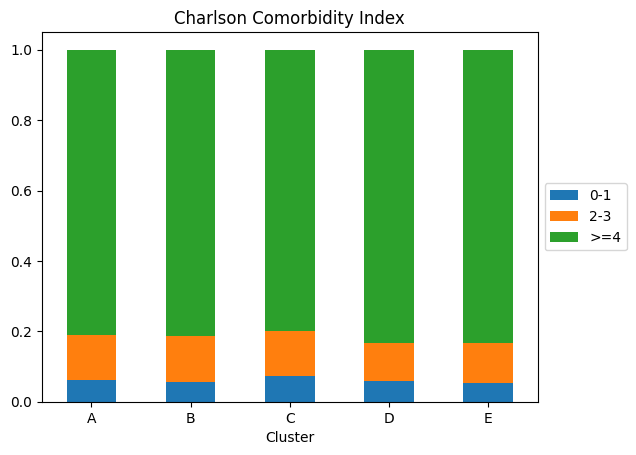

In [325]:
df_patient.groupby(['cluster_alpha'])['charlson'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, title="Charlson Comorbidity Index")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("charlson.png", bbox_inches='tight')

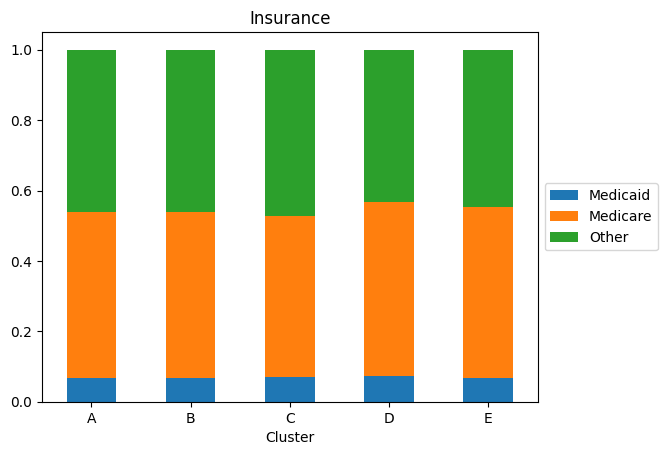

In [326]:
df_patient.groupby(['cluster_alpha'])['insurance'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, title="Insurance")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("insurance.png", bbox_inches='tight')

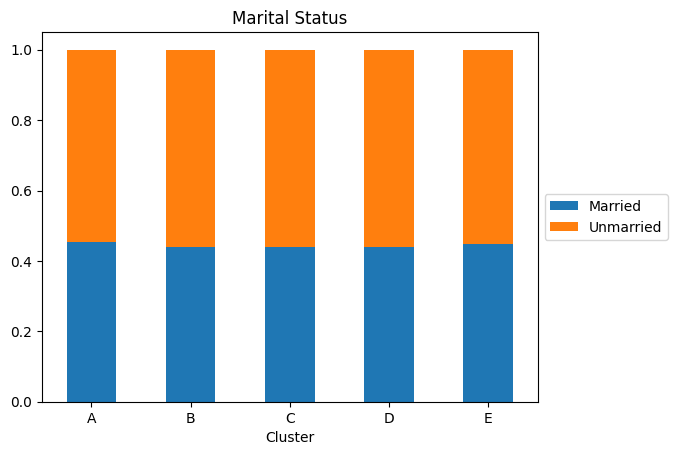

In [327]:
conditions = [
    (df_patient['marital_status'] == "MARRIED"),
    (df_patient['marital_status'] != "MARRIED")
    ]

# create a list of the values we want to assign for each condition
values = ['Married', 'Unmarried']

# create a new column and use np.select to assign values to it using our lists as arguments
df_patient['marry_split'] = np.select(conditions, values)

df_patient.groupby(['cluster_alpha'])['marry_split'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, title="Marital Status")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("marital_status.png", bbox_inches='tight')

In [328]:
conditions = [
    (df_patient['age'] >= 65),
    (df_patient['age'] < 65)
    ]

# create a list of the values we want to assign for each condition
values = ['>=65', '<65']

# create a new column and use np.select to assign values to it using our lists as arguments
df_patient['age_split'] = np.select(conditions, values)

In [317]:
df_patient

,stay_id,age,gender,intime,outtime,deathtime,los,insurance,language,marital_status,...,charlson_comorbidity_index,hospital_expire_flag,cluster,cluster_alpha,language_split,race_split,marry_split,charlson,dead_or_alive,age_split
0,30000646,44.319070,M,2194-04-29 01:39:22,2194-05-03 18:23:48,2194-05-06 02:29:00,4.697523,Medicaid,?,MARRIED,...,7,1,4,A,Non-English,Non-White,Married,>=4,Dead,<65
1,30001471,91.334102,M,2189-05-02 06:57:00,2189-05-05 16:02:33,NaN,3.378854,Other,?,MARRIED,...,7,0,0,C,Non-English,Non-White,Married,>=4,Alive,>=65
2,30003087,55.918622,M,2132-12-01 20:58:25,2132-12-07 21:18:19,NaN,6.013819,Other,ENGLISH,NaN,...,3,0,0,C,English,Non-White,Unmarried,2-3,Alive,<65
3,30003598,64.171038,F,2189-04-14 20:27:25,2189-04-19 15:57:41,NaN,4.812685,Medicare,ENGLISH,MARRIED,...,4,0,2,B,English,White,Married,>=4,Alive,<65
4,30004018,56.987924,F,2158-12-27 21:32:00,2159-01-12 23:47:50,2159-01-12 17:45:00,16.094329,Other,ENGLISH,MARRIED,...,3,1,1,E,English,White,Married,2-3,Dead,<65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22435,39998012,40.091125,F,2133-02-03 06:48:42,2133-02-09 02:55:42,2133-02-08 23:02:00,5.838194,Medicare,ENGLISH,MARRIED,...,3,1,1,E,English,White,Married,2-3,Dead,<65
22436,39998622,67.109608,M,2135-02-11 18:13:55,2135-02-20 17:53:16,NaN,8.985660,Other,ENGLISH,MARRIED,...,5,0,4,A,English,White,Married,>=4,Alive,>=65
22437,39999230,49.648598,M,2147-08-31 22:31:28,2147-09-09 17:54:10,NaN,8.807431,Other,ENGLISH,MARRIED,...,4,0,0,C,English,White,Married,>=4,Alive,<65
22438,39999562,71.058909,M,2129-01-24 17:24:09,2129-01-29 17:18:49,NaN,4.996296,Medicare,ENGLISH,MARRIED,...,5,0,4,A,English,White,Married,>=4,Alive,>=65


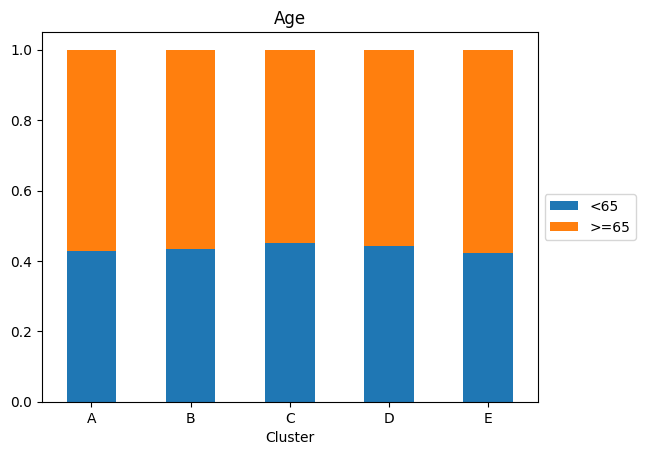

In [330]:
df_patient.groupby(['cluster_alpha'])['age_split'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, title="Age")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/age.png", bbox_inches='tight')

In [333]:
df_patient[df_patient['age'] < 20]

,stay_id,age,gender,intime,outtime,deathtime,los,insurance,language,marital_status,...,charlson_comorbidity_index,hospital_expire_flag,cluster,cluster_alpha,language_split,race_split,marry_split,charlson,dead_or_alive,age_split
576,30257222,18.035903,M,2129-01-14 08:00:00,2129-01-17 16:52:18,NaN,3.369653,Other,ENGLISH,SINGLE,...,1,0,1,E,English,Non-White,Unmarried,0-1,Alive,<65
882,30384015,19.184980,F,2110-03-09 13:32:25,2110-03-12 22:44:43,NaN,3.383542,Other,ENGLISH,NaN,...,0,0,4,A,English,Non-White,Unmarried,0-1,Alive,<65
1459,30625226,19.593997,F,2173-08-06 01:31:00,2173-08-11 21:37:20,NaN,5.837731,Other,ENGLISH,NaN,...,1,0,0,C,English,Non-White,Unmarried,0-1,Alive,<65
2034,30901667,19.878788,M,2129-11-18 00:55:07,2129-11-23 22:29:08,NaN,5.898623,Other,ENGLISH,SINGLE,...,0,0,4,A,English,Non-White,Unmarried,0-1,Alive,<65
4266,31913906,19.485492,M,2112-06-26 22:22:45,2112-07-08 13:13:48,NaN,11.618785,Medicaid,ENGLISH,SINGLE,...,2,0,3,D,English,White,Unmarried,2-3,Alive,<65
5407,32398411,18.423650,F,2162-06-05 15:25:42,2162-06-09 20:22:03,NaN,4.205799,Other,ENGLISH,SINGLE,...,0,0,3,D,English,Non-White,Unmarried,0-1,Alive,<65
5424,32406803,18.788486,M,2150-10-15 23:43:54,2150-10-28 22:00:38,NaN,12.928287,Other,ENGLISH,SINGLE,...,3,0,0,C,English,White,Unmarried,2-3,Alive,<65
6388,32840819,19.419109,M,2166-06-03 08:48:51,2166-06-06 16:41:59,NaN,3.328565,Other,ENGLISH,SINGLE,...,0,0,2,B,English,White,Unmarried,0-1,Alive,<65
6429,32858356,18.389057,M,2125-05-23 03:18:00,2125-05-28 02:01:30,NaN,4.946875,Other,ENGLISH,SINGLE,...,1,0,0,C,English,White,Unmarried,0-1,Alive,<65
6920,33072687,19.613883,M,2171-08-13 05:12:31,2171-09-15 17:05:47,NaN,33.495324,Other,ENGLISH,SINGLE,...,0,0,0,C,English,White,Unmarried,0-1,Alive,<65


<BarContainer object of 22440 artists>

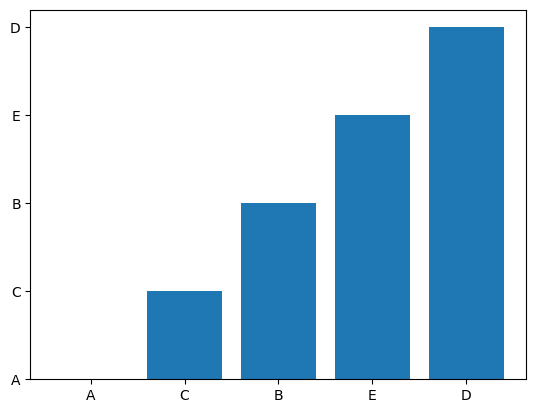

In [377]:
dist = df_patient["cluster_alpha"].value_counts()
dist

C    5333
A    5091
E    4350
D    3911
B    3755
Name: cluster_alpha, dtype: int64

In [379]:
dist = [5091, 3755, 5333, 3911, 4350]
lab = ["A", "B", "C", "D", "E"]

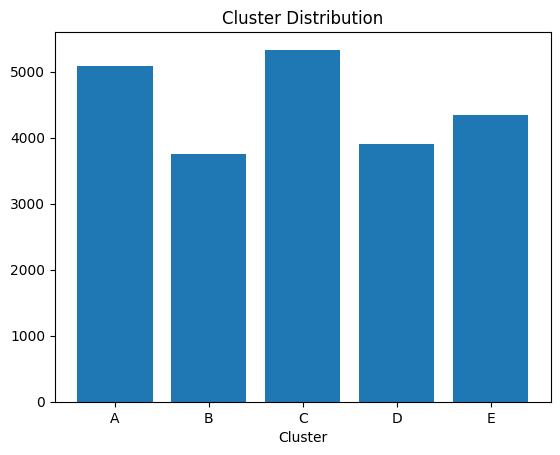

In [390]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

plt.bar(lab,dist)
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.savefig("cluster_distribution.png")